In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_excel(r"C:\Users\HP\Desktop\Six igma BB\BB Project\Oil_data.xlsx")
df=pd.DataFrame(data)
df.head()
df.columns

Index(['Well_ID', 'Date', 'Location', 'Depth_m', 'Daily_Production_bbl',
       'Water_Content_%', 'API_Gravity', 'Temperature_C', 'Pressure_Pa',
       'Extraction_Method', 'Operational_Cost_$', 'Downtime%',
       'Equipment_ failures', 'Maintenance_delay_in_hours',
       'Deliverables_count_day_in_Oil_tins', 'Jobs_Accepted_count', 'CFB',
       'Associate_ID'],
      dtype='object')

In [33]:
# Convert to DataFrame
df = pd.DataFrame(data)


In [19]:
# Preprocessing: Convert categorical variables using OneHotEncoder
categorical_columns = ['Location', 'Extraction_Method', 'Equipment_ failures']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
df_encoded

,Well_ID,Date,Depth_m,Daily_Production_bbl,Water_Content_%,API_Gravity,Temperature_C,Pressure_Pa,Operational_Cost_$,Downtime%,...,Location_Norway,Location_Oman,Location_Qatar,Location_Russia,Location_Saudi Arabia,Location_USA,Location_Venezula,Extraction_Method_Hydraulic Fracturing,Extraction_Method_Thermal Recovery,Equipment_ failures_No Failure
0,1,1711929600000000000,3500,1000,5,35.5,75,6400,50000,16,...,False,False,False,False,False,True,False,True,False,True
1,2,1712016000000000000,4200,900,7,32.0,70,7800,55000,12,...,False,False,False,False,False,False,False,False,True,False
2,3,1712102400000000000,3000,1700,3,40.0,85,5800,60000,14,...,False,False,False,False,True,False,False,False,False,True
3,4,1712188800000000000,3700,1600,6,34.0,80,9085,52000,10,...,False,False,False,False,False,False,False,True,False,True
4,5,1712275200000000000,3400,1400,8,30.0,78,6118,47907,11,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,1719360000000000000,1070,724,9,40.0,65,7407,50650,13,...,False,False,False,False,False,False,False,False,True,False
87,88,1719446400000000000,1827,743,10,50.0,81,6688,54784,13,...,False,False,False,False,False,False,False,False,False,False
88,89,1719532800000000000,1481,830,4,40.0,90,9994,65684,11,...,False,False,False,False,False,False,False,True,False,False
89,90,1719619200000000000,1449,700,5,41.0,69,5515,62149,13,...,False,False,False,False,False,False,True,True,False,False


In [21]:
# Define the independent variables (X) and the dependent variable (y)
X = df_encoded.drop(columns=['Well_ID', 'Date', 'Daily_Production_bbl', 'Associate_ID'])
y = df_encoded['Daily_Production_bbl']

In [35]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [40]:
# Fit the model on the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
# Predict on the test set
y_pred = gbr.predict(X_test)

In [44]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 29110.366152897514
R-squared: -0.022821474453606383


In [60]:
# Plotting feature importance
feature_importance = gbr.feature_importances_
# Create a DataFrame for feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

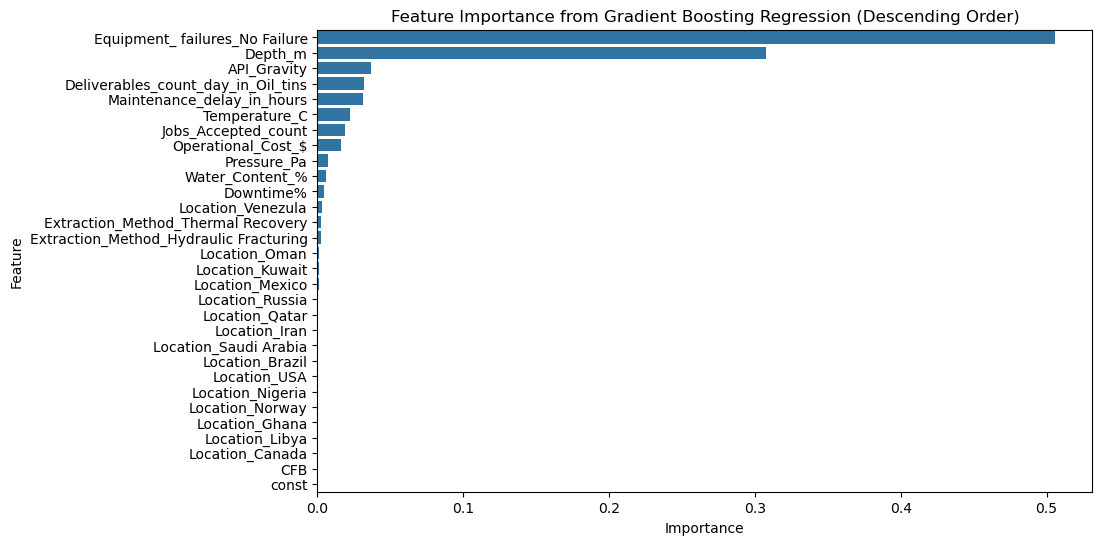

In [66]:
# Sort the DataFrame by 'Importance' in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importance from Gradient Boosting Regression (Descending Order)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(False)
plt.show()
